In [48]:
import pandas as pd
import numpy as np

In [49]:
df_features = pd.read_csv('features.csv')
df_stores = pd.read_csv('stores.csv')
df_train = pd.read_csv('train.csv')

In [50]:
df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31000,2.57200,NaN,NaN,NaN,NaN,NaN,211.09636,8.10600,False
1,1,2010-02-12,38.51000,2.54800,NaN,NaN,NaN,NaN,NaN,211.24217,8.10600,True
2,1,2010-02-19,39.93000,2.51400,NaN,NaN,NaN,NaN,NaN,211.28914,8.10600,False
3,1,2010-02-26,46.63000,2.56100,NaN,NaN,NaN,NaN,NaN,211.31964,8.10600,False
4,1,2010-03-05,46.50000,2.62500,NaN,NaN,NaN,NaN,NaN,211.35014,8.10600,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05000,3.63900,4842.29000,975.03000,3.00000,2449.97000,3169.69000,NaN,NaN,False
8186,45,2013-07-05,77.50000,3.61400,9090.48000,2268.58000,582.74000,5797.47000,1514.93000,NaN,NaN,False
8187,45,2013-07-12,79.37000,3.61400,3789.94000,1827.31000,85.72000,744.84000,2150.36000,NaN,NaN,False
8188,45,2013-07-19,82.84000,3.73700,2961.49000,1047.07000,204.19000,363.00000,1059.46000,NaN,NaN,False


In [51]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [52]:
#Tratamento de nulos
for i in df_features['Store'].unique():
    df_features['CPI'].fillna(df_features.loc[df_features['Store']==i].CPI.mean(), inplace=True)
    df_features['Unemployment'].fillna(df_features.loc[df_features['Store']==i].Unemployment.mean(), inplace=True) 
df_features.fillna(0, inplace = True)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [53]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50000,False
1,1,1,2010-02-12,46039.49000,True
2,1,1,2010-02-19,41595.55000,False
3,1,1,2010-02-26,19403.54000,False
4,1,1,2010-03-05,21827.90000,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37000,False
421566,45,98,2012-10-05,628.10000,False
421567,45,98,2012-10-12,1061.02000,False
421568,45,98,2012-10-19,760.01000,False


In [54]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [55]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# Uniao das Tabelas

In [56]:
df = df_train.merge(df_stores, how = 'left', on = 'Store')

In [57]:
df = df.merge(df_features, how = 'left', on =  ['Date', 'Store','IsHoliday'] )

In [58]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50000,False,A,151315,42.31000,2.57200,0.00000,0.00000,0.00000,0.00000,0.00000,211.09636,8.10600
1,1,1,2010-02-12,46039.49000,True,A,151315,38.51000,2.54800,0.00000,0.00000,0.00000,0.00000,0.00000,211.24217,8.10600
2,1,1,2010-02-19,41595.55000,False,A,151315,39.93000,2.51400,0.00000,0.00000,0.00000,0.00000,0.00000,211.28914,8.10600
3,1,1,2010-02-26,19403.54000,False,A,151315,46.63000,2.56100,0.00000,0.00000,0.00000,0.00000,0.00000,211.31964,8.10600
4,1,1,2010-03-05,21827.90000,False,A,151315,46.50000,2.62500,0.00000,0.00000,0.00000,0.00000,0.00000,211.35014,8.10600


In [59]:
df.shape

(421570, 16)

In [60]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
dtype: int64

# EDA

In [61]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.00000,22.20055,12.78530,1.00000,11.00000,22.00000,33.00000,45.00000
Dept,421570.00000,44.26032,30.49205,1.00000,18.00000,37.00000,74.00000,99.00000
Weekly_Sales,421570.00000,15981.25812,22711.18352,-4988.94000,2079.65000,7612.03000,20205.85250,693099.36000
Size,421570.00000,136727.91574,60980.58333,34875.00000,93638.00000,140167.00000,202505.00000,219622.00000
Temperature,421570.00000,60.09006,18.44793,-2.06000,46.68000,62.09000,74.28000,100.14000
Fuel_Price,421570.00000,3.36103,0.45851,2.47200,2.93300,3.45200,3.73800,4.46800
MarkDown1,421570.00000,2590.07482,6052.38593,0.00000,0.00000,0.00000,2809.05000,88646.76000
MarkDown2,421570.00000,879.97430,5084.53880,-265.76000,0.00000,0.00000,2.20000,104519.54000
MarkDown3,421570.00000,468.08767,5528.87345,-29.10000,0.00000,0.00000,4.54000,141630.61000
MarkDown4,421570.00000,1083.13227,3894.52995,0.00000,0.00000,0.00000,425.29000,67474.85000


In [62]:
pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [63]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50000,False,A,151315,42.31000,2.57200,0.00000,0.00000,0.00000,0.00000,0.00000,211.09636,8.10600
1,1,1,2010-02-12,46039.49000,True,A,151315,38.51000,2.54800,0.00000,0.00000,0.00000,0.00000,0.00000,211.24217,8.10600
2,1,1,2010-02-19,41595.55000,False,A,151315,39.93000,2.51400,0.00000,0.00000,0.00000,0.00000,0.00000,211.28914,8.10600
3,1,1,2010-02-26,19403.54000,False,A,151315,46.63000,2.56100,0.00000,0.00000,0.00000,0.00000,0.00000,211.31964,8.10600
4,1,1,2010-03-05,21827.90000,False,A,151315,46.50000,2.62500,0.00000,0.00000,0.00000,0.00000,0.00000,211.35014,8.10600


In [64]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object

In [65]:
df['Date'] = df['Date'].astype('datetime64[ns]') 

In [66]:
df['Date'].dt.year.unique()
df['Semana'] = df['Date'].dt.week
df['Mes'] = df['Date'].dt.month
df['Ano'] = df['Date'].dt.year

<ipython-input-66-b829a4a00862>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Semana'] = df['Date'].dt.week


In [67]:
df[['Store','Weekly_Sales']].groupby(by='Store').sum().head()

,Weekly_Sales
Store,
1,222402808.85000
2,275382440.98000
3,57586735.07000
4,299543953.38000
5,45475688.90000


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

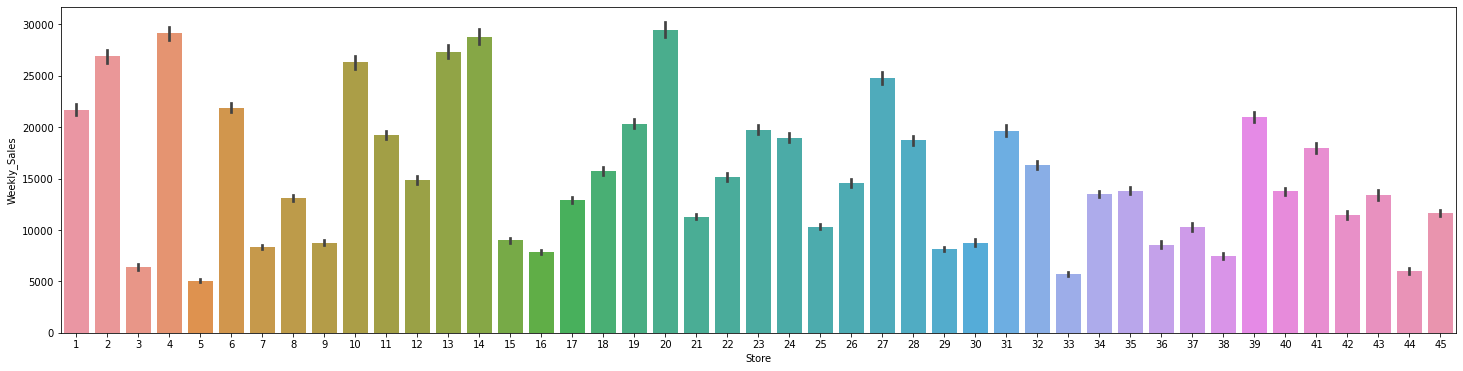

In [69]:
plt.figure(figsize= (25,6))
sns.barplot(x="Store", y="Weekly_Sales", data=df)

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

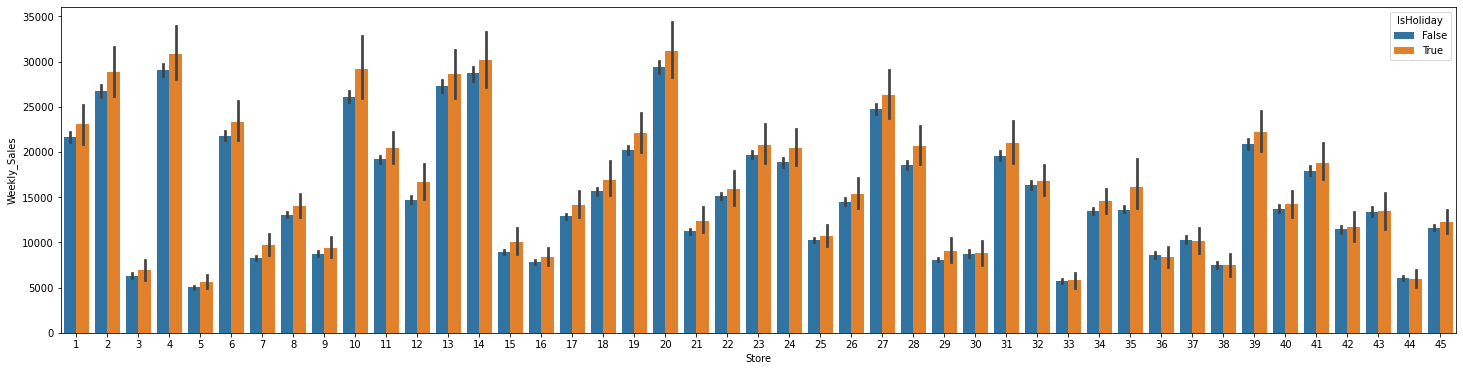

In [70]:
plt.figure(figsize= (25,6))
sns.barplot(x="Store", y="Weekly_Sales", data=df, hue = 'IsHoliday')

In [71]:
df.groupby('Type').median()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Semana,Mes,Ano
Type,,,,,,,,,,,,,,,,,
A,24,38,10105.17000,False,202505,62.78000,3.41700,0.00000,0.00000,0.00000,0.00000,0.00000,189.61901,7.81800,26,6,2011
B,17,36,6187.87000,False,114533,58.97000,3.49400,0.00000,0.00000,0.00000,0.00000,0.00000,140.44479,7.87200,26,6,2011
C,38,40,1149.67000,False,39910,69.03000,3.41700,0.00000,0.00000,0.00000,0.00000,0.00000,131.14997,8.30000,26,6,2011


<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

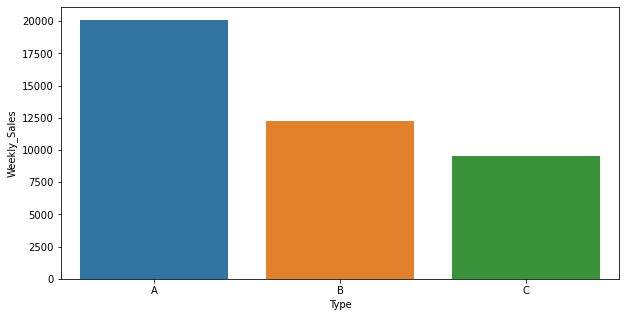

In [72]:
#media
df_agg = df[['Type', 'Weekly_Sales']].groupby(by='Type').agg({
    'Weekly_Sales':'mean'
}).reset_index() 
plt.figure(figsize=(10,5))
sns.barplot(x='Type', y='Weekly_Sales', data=df_agg) 

<AxesSubplot:xlabel='Type', ylabel='Weekly_Sales'>

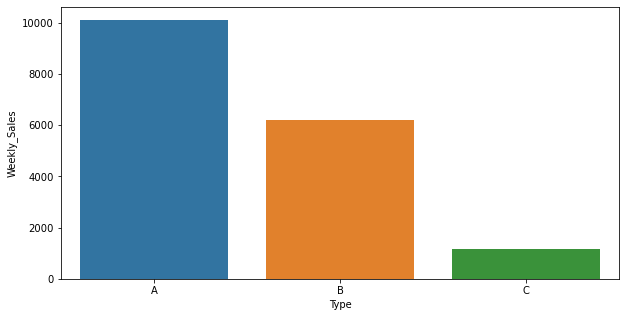

In [73]:
#mediana
df_agg = df[['Type', 'Weekly_Sales']].groupby(by='Type').agg({
    'Weekly_Sales':'median'
}).reset_index() 
plt.figure(figsize=(10,5))
sns.barplot(x='Type', y='Weekly_Sales', data=df_agg) 

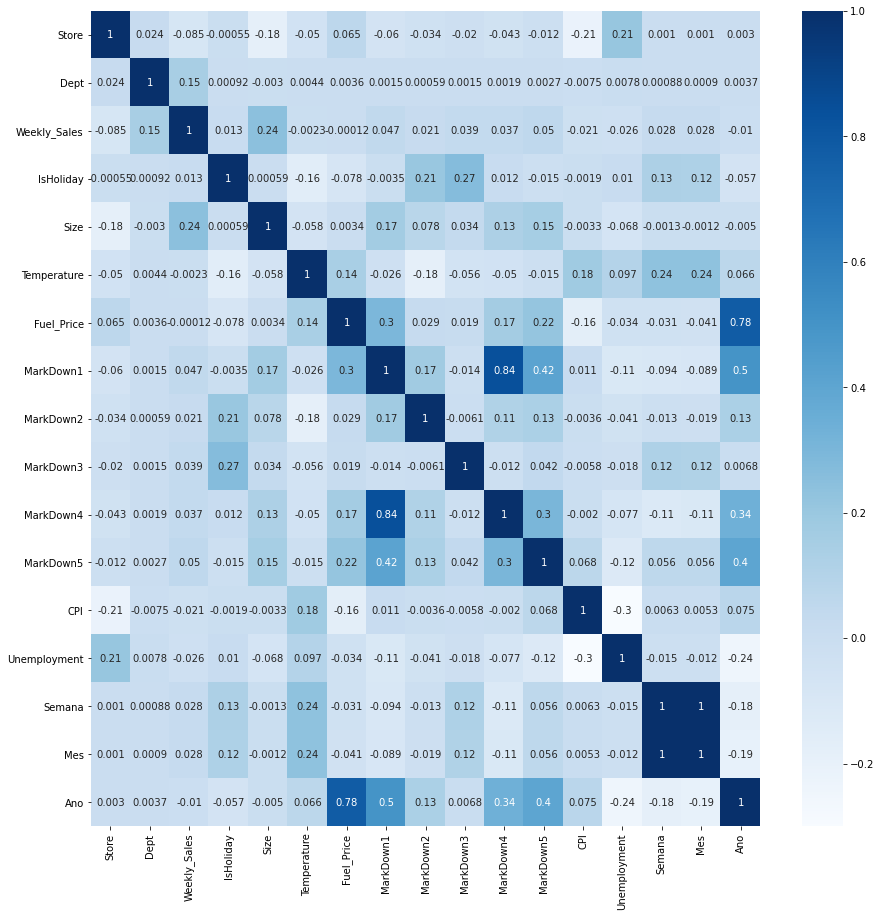

In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show() 

In [75]:
df_anual = df.groupby(['Mes', 'Ano']).mean().reset_index()

In [76]:
df_anual.head()

,Mes,Ano,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Semana
0,1,2011,22.14211,44.00257,13997.77399,0.00000,137153.15374,33.68518,3.11585,0.00000,0.00000,0.00000,0.00000,0.00000,168.34926,8.23831,2.49816
1,1,2012,22.19283,44.25553,14252.69803,0.00000,136369.49114,40.19201,3.36941,3107.31035,9387.10700,84.32868,580.77674,3650.67531,173.93425,7.48246,2.49705
2,2,2010,22.03404,44.24309,16076.77870,0.24968,137419.35451,35.57840,2.69329,0.00000,0.00000,0.00000,0.00000,0.00000,167.45283,8.57046,6.50038
3,2,2011,22.15799,44.07453,15870.14120,0.25023,136899.54723,37.21415,3.17427,0.00000,0.00000,0.00000,0.00000,0.00000,169.18178,8.23947,6.50106
4,2,2012,22.19915,44.54755,16077.64771,0.25121,136511.03893,41.86425,3.53402,17646.95521,5457.49257,61.97448,12370.74577,6054.92101,174.25368,7.48501,6.49824


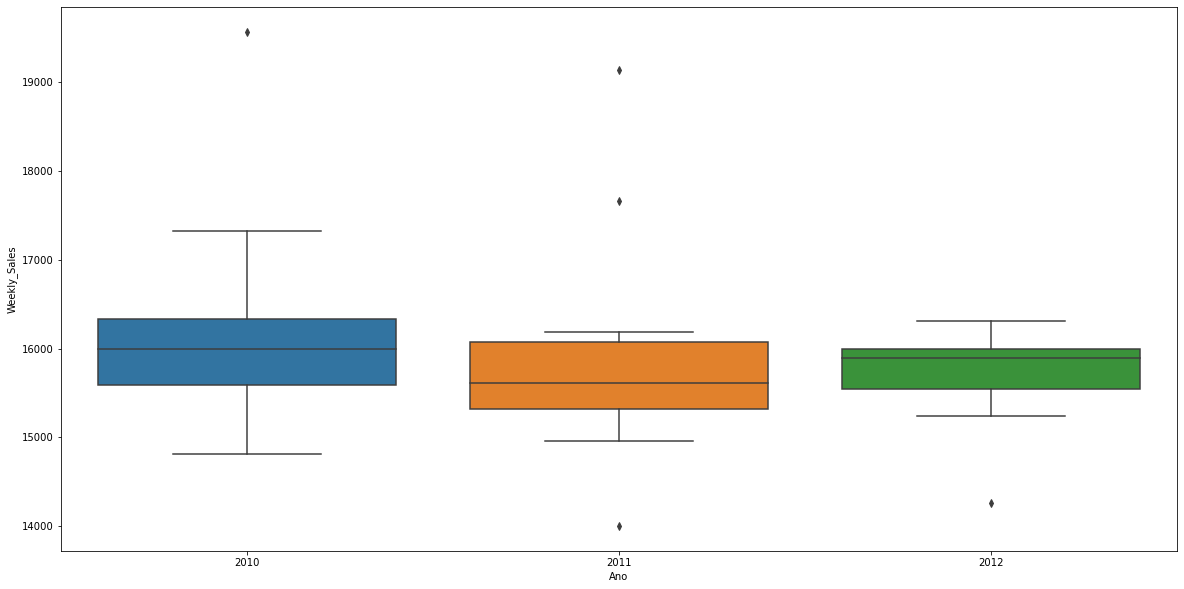

In [77]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df_anual, x = 'Ano',  y = 'Weekly_Sales')
plt.show()

# Tratamento dos Dados

In [78]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Semana,Mes,Ano
0,1,1,2010-02-05,24924.50000,False,A,151315,42.31000,2.57200,0.00000,0.00000,0.00000,0.00000,0.00000,211.09636,8.10600,5,2,2010
1,1,1,2010-02-12,46039.49000,True,A,151315,38.51000,2.54800,0.00000,0.00000,0.00000,0.00000,0.00000,211.24217,8.10600,6,2,2010
2,1,1,2010-02-19,41595.55000,False,A,151315,39.93000,2.51400,0.00000,0.00000,0.00000,0.00000,0.00000,211.28914,8.10600,7,2,2010
3,1,1,2010-02-26,19403.54000,False,A,151315,46.63000,2.56100,0.00000,0.00000,0.00000,0.00000,0.00000,211.31964,8.10600,8,2,2010
4,1,1,2010-03-05,21827.90000,False,A,151315,46.50000,2.62500,0.00000,0.00000,0.00000,0.00000,0.00000,211.35014,8.10600,9,3,2010


In [79]:
col_types = pd.get_dummies(df['Type'])

In [80]:
df['A'] = col_types['A']
df['B'] = col_types['B']
df['C'] = col_types['C']
df.drop(columns='Type', inplace=True)

In [81]:
df['IsHoliday'] = df['IsHoliday'].astype('int')

In [82]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,Semana,Mes,Ano,A,B,C
0,1,1,2010-02-05,24924.50000,0,151315,42.31000,2.57200,0.00000,0.00000,...,0.00000,0.00000,211.09636,8.10600,5,2,2010,1,0,0
1,1,1,2010-02-12,46039.49000,1,151315,38.51000,2.54800,0.00000,0.00000,...,0.00000,0.00000,211.24217,8.10600,6,2,2010,1,0,0
2,1,1,2010-02-19,41595.55000,0,151315,39.93000,2.51400,0.00000,0.00000,...,0.00000,0.00000,211.28914,8.10600,7,2,2010,1,0,0
3,1,1,2010-02-26,19403.54000,0,151315,46.63000,2.56100,0.00000,0.00000,...,0.00000,0.00000,211.31964,8.10600,8,2,2010,1,0,0
4,1,1,2010-03-05,21827.90000,0,151315,46.50000,2.62500,0.00000,0.00000,...,0.00000,0.00000,211.35014,8.10600,9,3,2010,1,0,0


In [83]:
df['IsHoliday'].value_counts()

0    391909
1     29661
Name: IsHoliday, dtype: int64

# Análise Micro

## Separação de Treino e Teste

In [84]:
from sklearn.preprocessing import StandardScaler 

In [85]:
df_ml = df.drop(columns = ['Date', 'Semana', 'Mes', 'Ano'])

In [86]:
scaler = StandardScaler()
scaler.fit(df_ml)

df_ml_scaled = scaler.transform(df_ml)

df_ml_scaled = pd.DataFrame(df_ml_scaled, columns = df_ml.columns) 

In [87]:
df_ml_scaled

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,A,B,C
0,-1.65820,-1.41874,0.39378,-0.27511,0.23921,-0.96380,-1.72083,-0.42794,-0.17307,-0.08466,-0.27812,-0.39518,1.01877,0.07820,0.97798,-0.79594,-0.33526
1,-1.65820,-1.41874,1.32350,3.63496,0.23921,-1.16978,-1.77318,-0.42794,-0.17307,-0.08466,-0.27812,-0.39518,1.02250,0.07820,0.97798,-0.79594,-0.33526
2,-1.65820,-1.41874,1.12783,-0.27511,0.23921,-1.09281,-1.84733,-0.42794,-0.17307,-0.08466,-0.27812,-0.39518,1.02370,0.07820,0.97798,-0.79594,-0.33526
3,-1.65820,-1.41874,0.15069,-0.27511,0.23921,-0.72963,-1.74482,-0.42794,-0.17307,-0.08466,-0.27812,-0.39518,1.02448,0.07820,0.97798,-0.79594,-0.33526
4,-1.65820,-1.41874,0.25743,-0.27511,0.23921,-0.73667,-1.60524,-0.42794,-0.17307,-0.08466,-0.27812,-0.39518,1.02526,0.07820,0.97798,-0.79594,-0.33526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.78326,1.76242,-0.68129,-0.27511,-0.30349,0.25965,1.38703,0.32492,-0.16901,-0.08439,0.13298,0.38632,0.53146,0.38840,-1.02252,1.25638,-0.33526
421566,1.78326,1.76242,-0.67602,-0.27511,-0.30349,0.26019,1.36086,0.40590,-0.17307,-0.08126,0.30050,0.16095,0.53547,0.37928,-1.02252,1.25638,-0.33526
421567,1.78326,1.76242,-0.65696,-0.27511,-0.30349,-0.30464,1.39357,-0.10472,-0.17307,-0.08324,-0.12423,0.55323,0.53947,0.37928,-1.02252,1.25638,-0.33526
421568,1.78326,1.76242,-0.67021,-0.27511,-0.30349,-0.19623,1.32596,-0.09683,-0.17307,-0.08409,-0.16572,-0.02978,0.53956,0.37928,-1.02252,1.25638,-0.33526


In [88]:
df_ml_sample = df_ml_scaled.sample(1000, random_state = 1)

In [89]:
X = df_ml_sample.drop(columns= 'Weekly_Sales')
y = df_ml_sample['Weekly_Sales']

In [90]:
X.shape

(1000, 16)

## Treinamento Padrão de Modelos

In [91]:
from sklearn.metrics import r2_score, mean_squared_error 

In [92]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
    r2 = r2_score(y_teste, previsao)
    RSME = np.sqrt(mean_squared_error(y_teste, previsao))
    return f'Modelo: {nome_modelo}\nR2:{r2:.2}\nRSME:{RSME:.2f}\n' 

In [93]:
'''
a. Linear Regression 
b. SGDRegressor
c. GradientBoostingRegressor
d. ExtraTreesRegressor
e. RandomForestRegressor
f. HuberReg
7. Definição do Modelo: 
'''

'\na. Linear Regression \nb. SGDRegressor\nc. GradientBoostingRegressor\nd. ExtraTreesRegressor\ne. RandomForestRegressor\nf. HuberReg\n7. Definição do Modelo: \n'

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()
modelo_sg = SGDRegressor()
modelo_grad = GradientBoostingRegressor()
modelo_hub = HuberRegressor()
modelo_ada = AdaBoostRegressor()
modelo_svr = SVR()

modelos = {'RandomForest': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,
          'SGDRegressor': modelo_sg,
          'GradientBoostingRegressor': modelo_grad,
          'HuberRegressor': modelo_hub,
          'AdaBoostRegressor': modelo_ada,
          'SVR': modelo_svr}

for nome_modelo, modelo in modelos.items():
    # treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo,y_test,previsao)) 

Modelo: RandomForest
R2:0.59
RSME:0.62

Modelo: LinearRegression
R2:0.082
RSME:0.92

Modelo: ExtraTrees
R2:0.58
RSME:0.62

Modelo: SGDRegressor
R2:0.08
RSME:0.92

Modelo: GradientBoostingRegressor
R2:0.66
RSME:0.56

Modelo: HuberRegressor
R2:-0.0027
RSME:0.96

Modelo: AdaBoostRegressor
R2:-0.21
RSME:1.06

Modelo: SVR
R2:0.089
RSME:0.92



## Definição do Modelo

In [ ]:
'''
Escolhemos o modelo GradientBoostingRegressor:
Modelo: GradientBoostingRegressor
R2:66.34%
RSME:0.56
'''

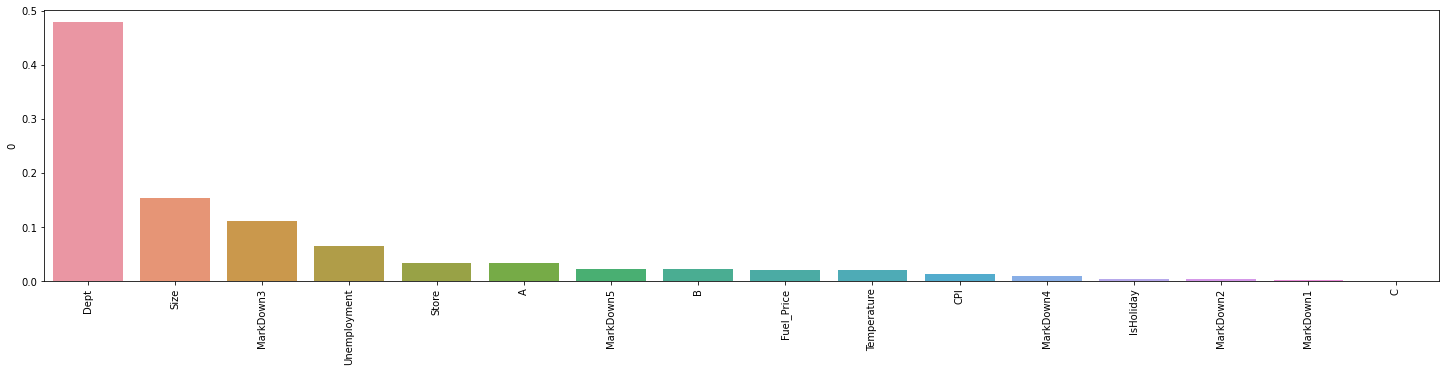

In [96]:
importancia_feature = pd.DataFrame(modelo_grad.feature_importances_, X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(25,5))
grafico = sns.barplot(x= importancia_feature.index, y=importancia_feature[0])
grafico.tick_params(axis='x', rotation = 90) 


In [110]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[20, 30, 50, 100, 500], 
            'learning_rate': [0.1,0.05,0.02, 0.01],
            'max_depth':[8, 10, 15, 20], 
            'min_samples_leaf':[5, 7, 10], 
            'max_features':[1.0] }

clf = GradientBoostingRegressor()

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.02, 0.01],
                         'max_depth': [8, 10, 15, 20], 'max_features': [1.0],
                         'min_samples_leaf': [5, 7, 10],
                         'n_estimators': [20, 30, 50, 100, 500]},
             verbose=2)

In [111]:
grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 10,
 'max_features': 1.0,
 'min_samples_leaf': 7,
 'n_estimators': 50}

In [112]:
clf_best = grid_search.best_estimator_

In [113]:
previsao = clf_best.predict(X_test)
print(avaliar_modelo('CLF Best',y_test,previsao))

Modelo: CLF Best
R2:0.67
RSME:0.55



# Todos os dados

In [114]:
df_ml_scaled.shape

(421570, 17)

In [119]:
X = df_ml_scaled.drop(columns= 'Weekly_Sales')
y = df_ml_scaled['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [120]:
X_train.shape

(316177, 16)

In [121]:
X_test.shape

(105393, 16)

In [122]:
grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 10,
 'max_features': 1.0,
 'min_samples_leaf': 7,
 'n_estimators': 50}

In [130]:
grad = GradientBoostingRegressor(learning_rate=0.05, max_depth=10, max_features=1.0, 
                                 min_samples_leaf=7, n_estimators=50)

grad.fit(X_train, y_train)
y_pred = grad.predict(X_test)

r2 = r2_score(y_test, y_pred)
RSME = np.sqrt(mean_squared_error(y_test, y_pred))

print(r2, RSME)

0.9152084136720201 0.2901258028282873
